# STEP 1 :- Web Scraping

#### 1) Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import requests
from bs4 import BeautifulSoup
from selenium import webdriver
import time
from selenium.webdriver.common.keys import Keys #sending text to input box
import matplotlib.pyplot as plt
import seaborn as sns

#### 2) Code to scrape data

In [ ]:
df = pd.DataFrame({'Name':[''], 'Speciality':[''], 'Degree':[''], 'Year_of_experience':[''] , 'Location':[''] , 'City':[''] ,'dp_score':[''], 'npv':[''], 'consultation_fee':[''], 'Link':['']})
lis=['Bangalore','Chennai','Delhi','Hyderabad','Mumbai','Pune']
Speciality = 'Cardiologist'
for i in lis:
    driver = webdriver.Chrome()
    url = f'https://www.practo.com/search/doctors?results_type=doctor&q=%5B%7B%22word%22%3A%22cardiologist%22%2C%22autocompleted%22%3Atrue%2C%22category%22%3A%22subspeciality%22%7D%5D&city={i}'
    driver.get(url)
    time.sleep(2)
    
    scroll_pause_time = 2 # You can set your own pause time. dont slow too slow that might not able to load more data
    screen_height = driver.execute_script("return window.screen.height;")  # get the screen height of the web
    A = 1

    while True:
        # scroll one screen height each time
        driver.execute_script("window.scrollTo(0, {screen_height}*{A});".format(screen_height=screen_height, A=A))
        A += 1
        time.sleep(scroll_pause_time)
        # update scroll height each time after scrolled, as the scroll height can change after we scrolled the page
        scroll_height = driver.execute_script("return document.body.scrollHeight;")
        # Break the loop when the height we need to scroll to is larger than the total scroll height
        if (screen_height) * A > scroll_height:
            break

    soup = BeautifulSoup(driver.page_source,'lxml')
    postings = soup.find_all('div' , class_= 'u-border-general--bottom')
    for post in postings:
        try:
            link = post.find('div' , class_ = 'listing-doctor-card').find('a').get('href')
            link_full = 'https://www.practo.com'+link
            driver.get(link_full)
            soup2 = BeautifulSoup(driver.page_source,'lxml')

            #extracting name
            try:
                name = soup2.find('h1' , class_ = 'c-profile__title u-bold u-d-inlineblock').text
            except:
                pass       
            #extracting degree
            try:
                Degree = soup2.find('p' , class_ = 'c-profile__details').text
            except:
                pass
            #extracting years of experience
            try:
                Year_of_experience = soup2.find('div' , class_ = 'c-profile__details').find_all('h2')[-1].text
            except:
                pass
            #extracting location
            try:
                Location = soup2.find('h4' , class_ = 'c-profile--clinic__location').text
            except:
                pass
            #extracting dp score
            try:
                dp_score = soup2.find('span' , class_ = 'u-green-text u-bold u-large-font').text.strip()
            except:
                pass
            #extracting npv
            try:
                npv = soup2.find('span' , class_ = 'u-smallest-font u-grey_3-text').text
            except:
                pass
            #extracting consulting fee
            try:
                consultant_fee = soup2.find('span' , class_ = 'u-strike').text.strip()
            except:
                consultant_fee = soup2.find('div' , class_ = 'u-f-right u-large-font u-bold u-valign--middle u-lheight-normal').text.strip()

            df = df.append({'Name':name, 'Speciality':Speciality, 'Degree':Degree, 'Year_of_experience':Year_of_experience , 'Location':Location , 'City':i ,'dp_score':dp_score, 'npv':npv, 'consultation_fee':consultant_fee, 'Link':link_full} , ignore_index = True)
        except:
            pass

In [6]:
df.head()

,Name,Speciality,Degree,Year_of_experience,Location,City,dp_score,npv,consultation_fee,Link
0,,,,,,,,,,
1,Dr. B. Ramesh,Cardiologist,"DM - Cardiology, MD - General Medicine, MBBS",37 Years Experience Overall (32 years as spec...,"Bannerghatta Road, Bangalore",Bangalore,98%,(986 votes),₹ 1000 fee,https://www.practo.com/bangalore/doctor/dr-ram...
2,Dr. Sunil Kumar S,Cardiologist,"MBBS, MD - General Medicine, DM - Cardiology, ...",19 Years Experience Overall (9 years as speci...,"Hebbal, Bangalore",Bangalore,100%,(45 votes),₹ 1000 fee,https://www.practo.com/bangalore/doctor/dr-sun...
3,Dr. Venkatesh S,Cardiologist,"MBBS, MD - Medicine, DM - Cardiology",29 Years Experience Overall (19 years as spec...,"JP Nagar, Bangalore",Bangalore,97%,(36 votes),₹ 1050 fee,https://www.practo.com/bangalore/doctor/dr-ven...
4,Dr. K P Srihari Das,Cardiologist,"MBBS, MD - General Medicine, DM - Cardiology",29 Years Experience Overall (18 years as spec...,"Jayanagar 9 Block, Bangalore",Bangalore,97%,(62 votes),₹ 750 fee,https://www.practo.com/bangalore/doctor/dr-k-p...


In [8]:
df.shape

(372, 10)

#### 3) Exporting dataframe(df) as CSV file

In [4]:
df.to_csv('Cardiologist.csv', index=False)

#### Similarly we can extract data for other speciality by doing some changes in this code:
##### In line 3, assign the name of speciality to 'Speciality' variable.
##### In line 6, assign the url of that speciality to 'url' variable.

Specialities: Cardiologist,Chiropractor,Dentist,Dermatologist,Dietitian,Gastroenterologist,Gynecologist,Infertility Specialist, Neurologist,Neurosurgeon,Ophthalmologist,Orthopedist,Pediatrician,Physiotherapist,Psychiatrist,Pulmonologist,Rheumatologists, Urologist

# STEP 2:- Concat all the CSV files

In [9]:
df2 = pd.concat(
    map(pd.read_csv, ['Cardiologist.csv','Chiropractor.csv','Dentist.csv','Dermatologist.csv','Dietitian.csv','Gastroenterologist.csv','Gynecologist.csv','Infertility Specialist.csv', 'Neurologist.csv','Neurosurgeon.csv','Ophthalmologist.csv','Orthopedist.csv','Pediatrician.csv','Physiotherapist.csv','Psychiatrist.csv','Pulmonologist.csv','Rheumatologists.csv', 'Urologist.csv']), ignore_index=True)

In [10]:
df2.head()

,Unnamed: 0,Name,Degree,Years_Of_Experience,Speciality_of_doctor,Location,City,dp_score,npv,consultation_fee
0,0,Dr. Ramnaresh Soudri,"MBBS, MD - General Medicine, DM - Cardiology",5 Years Experience Overall,Cardiologist,"HSR Layout, Bangalore",Bangalore,96%,(28 votes),₹700
1,1,Dr. Roopa. R,"MBBS, MD - General Medicine, DNB - Cardiology",23 Years Experience Overall (11 years as spec...,Cardiologist,"Banashankari 2nd Stage, Bangalore",Bangalore,95%,(172 votes),₹650
2,2,Dr. Balaraju D,"MD - General Medicine, DNB - Cardiology, MBBS",12 Years Experience Overall (6 years as speci...,Cardiologist,"Jayanagar 9 Block, Bangalore",Bangalore,0,0,₹750
3,3,Dr. N Praveen Kumar,"MBBS, MD - General Medicine, Fellowship in Non...",15 Years Experience Overall,Cardiologist,"Yelahanka, Bangalore",Bangalore,90%,(101 votes),₹500
4,4,Dr. Srinivas Prasad B V,"MBBS, MD - Medicine, DM - Cardiology",21 Years Experience Overall (5 years as speci...,Cardiologist,"Jayanagar 4 Block, Bangalore",Bangalore,100%,(19 votes),₹600


In [11]:
df2.shape

(8975, 10)

# STEP 3:- Data Cleaning

In [12]:
df2.head()

,Unnamed: 0,Name,Degree,Years_Of_Experience,Speciality_of_doctor,Location,City,dp_score,npv,consultation_fee
0,0,Dr. Ramnaresh Soudri,"MBBS, MD - General Medicine, DM - Cardiology",5 Years Experience Overall,Cardiologist,"HSR Layout, Bangalore",Bangalore,96%,(28 votes),₹700
1,1,Dr. Roopa. R,"MBBS, MD - General Medicine, DNB - Cardiology",23 Years Experience Overall (11 years as spec...,Cardiologist,"Banashankari 2nd Stage, Bangalore",Bangalore,95%,(172 votes),₹650
2,2,Dr. Balaraju D,"MD - General Medicine, DNB - Cardiology, MBBS",12 Years Experience Overall (6 years as speci...,Cardiologist,"Jayanagar 9 Block, Bangalore",Bangalore,0,0,₹750
3,3,Dr. N Praveen Kumar,"MBBS, MD - General Medicine, Fellowship in Non...",15 Years Experience Overall,Cardiologist,"Yelahanka, Bangalore",Bangalore,90%,(101 votes),₹500
4,4,Dr. Srinivas Prasad B V,"MBBS, MD - Medicine, DM - Cardiology",21 Years Experience Overall (5 years as speci...,Cardiologist,"Jayanagar 4 Block, Bangalore",Bangalore,100%,(19 votes),₹600


#### 1) Droping Unnecessary columns

In [13]:
df2.drop('Unnamed: 0' , axis=1 , inplace=True)
df2.head()

,Name,Degree,Years_Of_Experience,Speciality_of_doctor,Location,City,dp_score,npv,consultation_fee
0,Dr. Ramnaresh Soudri,"MBBS, MD - General Medicine, DM - Cardiology",5 Years Experience Overall,Cardiologist,"HSR Layout, Bangalore",Bangalore,96%,(28 votes),₹700
1,Dr. Roopa. R,"MBBS, MD - General Medicine, DNB - Cardiology",23 Years Experience Overall (11 years as spec...,Cardiologist,"Banashankari 2nd Stage, Bangalore",Bangalore,95%,(172 votes),₹650
2,Dr. Balaraju D,"MD - General Medicine, DNB - Cardiology, MBBS",12 Years Experience Overall (6 years as speci...,Cardiologist,"Jayanagar 9 Block, Bangalore",Bangalore,0,0,₹750
3,Dr. N Praveen Kumar,"MBBS, MD - General Medicine, Fellowship in Non...",15 Years Experience Overall,Cardiologist,"Yelahanka, Bangalore",Bangalore,90%,(101 votes),₹500
4,Dr. Srinivas Prasad B V,"MBBS, MD - Medicine, DM - Cardiology",21 Years Experience Overall (5 years as speci...,Cardiologist,"Jayanagar 4 Block, Bangalore",Bangalore,100%,(19 votes),₹600


#### 2) Removing Noise

In [14]:
# Years_of__Experience Column :- Extracting only numeric values
df2['Years_Of_Experience'] = df2['Years_Of_Experience'].str.extract('(\d+)')

In [15]:
# dp_score column :- Extracting only numeric values
df2['dp_score'] = df2['dp_score'].str.extract('(\d+)')

In [16]:
# npv column :- Extracting only numeric values
df2['npv'] = df2['npv'].str.extract('(\d+)')

In [17]:
# consultation_fee column :- Extracting only numeric values
df2['consultation_fee'] = df2['consultation_fee'].str.extract('(\d+)')

In [18]:
df2.head()

,Name,Degree,Years_Of_Experience,Speciality_of_doctor,Location,City,dp_score,npv,consultation_fee
0,Dr. Ramnaresh Soudri,"MBBS, MD - General Medicine, DM - Cardiology",5,Cardiologist,"HSR Layout, Bangalore",Bangalore,96,28,700
1,Dr. Roopa. R,"MBBS, MD - General Medicine, DNB - Cardiology",23,Cardiologist,"Banashankari 2nd Stage, Bangalore",Bangalore,95,172,650
2,Dr. Balaraju D,"MD - General Medicine, DNB - Cardiology, MBBS",12,Cardiologist,"Jayanagar 9 Block, Bangalore",Bangalore,0,0,750
3,Dr. N Praveen Kumar,"MBBS, MD - General Medicine, Fellowship in Non...",15,Cardiologist,"Yelahanka, Bangalore",Bangalore,90,101,500
4,Dr. Srinivas Prasad B V,"MBBS, MD - Medicine, DM - Cardiology",21,Cardiologist,"Jayanagar 4 Block, Bangalore",Bangalore,100,19,600


#### 3) checking for null values

In [19]:
df2.isnull().sum()

Name                    0
Degree                  0
Years_Of_Experience     6
Speciality_of_doctor    0
Location                0
City                    0
dp_score                0
npv                     0
consultation_fee        0
dtype: int64

In [20]:
# Droping null values rows
df2.dropna(inplace=True)

#### 4) Checking Data types

In [21]:
df2.head(2)

,Name,Degree,Years_Of_Experience,Speciality_of_doctor,Location,City,dp_score,npv,consultation_fee
0,Dr. Ramnaresh Soudri,"MBBS, MD - General Medicine, DM - Cardiology",5,Cardiologist,"HSR Layout, Bangalore",Bangalore,96,28,700
1,Dr. Roopa. R,"MBBS, MD - General Medicine, DNB - Cardiology",23,Cardiologist,"Banashankari 2nd Stage, Bangalore",Bangalore,95,172,650


In [22]:
df2.dtypes

Name                    object
Degree                  object
Years_Of_Experience     object
Speciality_of_doctor    object
Location                object
City                    object
dp_score                object
npv                     object
consultation_fee        object
dtype: object

In [23]:
# Converting to numeric column
for i in df2.columns:
    df2[i] = pd.to_numeric(df2[i] , errors = 'ignore')

In [24]:
df2.dtypes

Name                    object
Degree                  object
Years_Of_Experience      int64
Speciality_of_doctor    object
Location                object
City                    object
dp_score                 int64
npv                      int64
consultation_fee         int64
dtype: object

#### 5) Spliting column
Here 'Location' column and city column both have city name which is not needed.
so here we will split the column using ',' delimeter and then remove the column contain city name.

In [25]:
df2.head()

,Name,Degree,Years_Of_Experience,Speciality_of_doctor,Location,City,dp_score,npv,consultation_fee
0,Dr. Ramnaresh Soudri,"MBBS, MD - General Medicine, DM - Cardiology",5,Cardiologist,"HSR Layout, Bangalore",Bangalore,96,28,700
1,Dr. Roopa. R,"MBBS, MD - General Medicine, DNB - Cardiology",23,Cardiologist,"Banashankari 2nd Stage, Bangalore",Bangalore,95,172,650
2,Dr. Balaraju D,"MD - General Medicine, DNB - Cardiology, MBBS",12,Cardiologist,"Jayanagar 9 Block, Bangalore",Bangalore,0,0,750
3,Dr. N Praveen Kumar,"MBBS, MD - General Medicine, Fellowship in Non...",15,Cardiologist,"Yelahanka, Bangalore",Bangalore,90,101,500
4,Dr. Srinivas Prasad B V,"MBBS, MD - Medicine, DM - Cardiology",21,Cardiologist,"Jayanagar 4 Block, Bangalore",Bangalore,100,19,600


In [26]:
df2[['Location', 'b']] = df2.Location.str.split(",", expand = True)
df2.head()
# here column Location will contain the exact location in the city and column 'b' contains the name of city
# we will drop column 'b'

,Name,Degree,Years_Of_Experience,Speciality_of_doctor,Location,City,dp_score,npv,consultation_fee,b
0,Dr. Ramnaresh Soudri,"MBBS, MD - General Medicine, DM - Cardiology",5,Cardiologist,HSR Layout,Bangalore,96,28,700,Bangalore
1,Dr. Roopa. R,"MBBS, MD - General Medicine, DNB - Cardiology",23,Cardiologist,Banashankari 2nd Stage,Bangalore,95,172,650,Bangalore
2,Dr. Balaraju D,"MD - General Medicine, DNB - Cardiology, MBBS",12,Cardiologist,Jayanagar 9 Block,Bangalore,0,0,750,Bangalore
3,Dr. N Praveen Kumar,"MBBS, MD - General Medicine, Fellowship in Non...",15,Cardiologist,Yelahanka,Bangalore,90,101,500,Bangalore
4,Dr. Srinivas Prasad B V,"MBBS, MD - Medicine, DM - Cardiology",21,Cardiologist,Jayanagar 4 Block,Bangalore,100,19,600,Bangalore


In [27]:
df2.drop('b' , axis=1 , inplace=True)

In [28]:
df2.head(2)

,Name,Degree,Years_Of_Experience,Speciality_of_doctor,Location,City,dp_score,npv,consultation_fee
0,Dr. Ramnaresh Soudri,"MBBS, MD - General Medicine, DM - Cardiology",5,Cardiologist,HSR Layout,Bangalore,96,28,700
1,Dr. Roopa. R,"MBBS, MD - General Medicine, DNB - Cardiology",23,Cardiologist,Banashankari 2nd Stage,Bangalore,95,172,650


# STEP 4:- Exploratory data analysis (EDA)

In [29]:
df2.head()

,Name,Degree,Years_Of_Experience,Speciality_of_doctor,Location,City,dp_score,npv,consultation_fee
0,Dr. Ramnaresh Soudri,"MBBS, MD - General Medicine, DM - Cardiology",5,Cardiologist,HSR Layout,Bangalore,96,28,700
1,Dr. Roopa. R,"MBBS, MD - General Medicine, DNB - Cardiology",23,Cardiologist,Banashankari 2nd Stage,Bangalore,95,172,650
2,Dr. Balaraju D,"MD - General Medicine, DNB - Cardiology, MBBS",12,Cardiologist,Jayanagar 9 Block,Bangalore,0,0,750
3,Dr. N Praveen Kumar,"MBBS, MD - General Medicine, Fellowship in Non...",15,Cardiologist,Yelahanka,Bangalore,90,101,500
4,Dr. Srinivas Prasad B V,"MBBS, MD - Medicine, DM - Cardiology",21,Cardiologist,Jayanagar 4 Block,Bangalore,100,19,600


#### 1) Number of doctors in each city

In [30]:
d1 = df2.groupby(by='City')['Name'].count().reset_index().sort_values(by='Name',ascending=False)
d1
#this will show numbers of doctors in each city

,City,Name
0,Bangalore,2183
2,Delhi,1615
4,Mumbai,1489
3,Hyderabad,1341
1,Chennai,1262
5,Pune,1079


<function matplotlib.pyplot.show(close=None, block=None)>

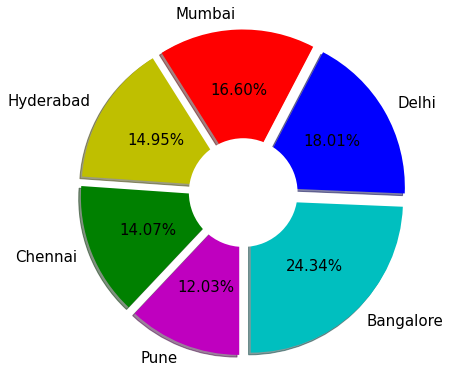

In [31]:
# Doughnut chart
plt.figure(figsize=(15,5))  #graph size

explode = [0.1,0.1,0.1,0.1,0.1,0.1] # To slice the perticuler section
colors = ["c", 'b','r','y','g','m'] # Color of each section
textprops = {"fontsize":15} # Font size of text in pie chart

plt.pie(d1['Name'], # Values
        labels = d1['City'], # Labels for each sections
        explode = explode, # To slice the perticuler section
        colors =colors, # Color of each section
        autopct = "%0.2f%%", # Show data in persentage for with 2 decimal point
        shadow = True, # Showing shadow of pie chart
        radius = 1.4, # Radius to increase or decrease the size of pie chart 
       startangle = 270, # Start angle of first section
        textprops =textprops)

plt.pie([1],colors=['w'],radius=0.5)

plt.show #print graph

Most doctors are from Bangalore

#### 2) Count of doctors in each speciality

In [32]:
d2 = df2.groupby(by='Speciality_of_doctor')['Name'].count().reset_index().sort_values(by='Name',ascending=False)
d2
#shows number of doctors in each speciality

,Speciality_of_doctor,Name
2,Dentist,2240
6,Gynecologist,1379
11,Orthopedist,790
12,Pediatrician,727
3,Dermatologist,626
13,Physiotherapist,466
10,Ophthalmologist,411
7,Infertility Specialist,357
0,Cardiologist,345
14,Psychiatrist,266


<function matplotlib.pyplot.show(close=None, block=None)>

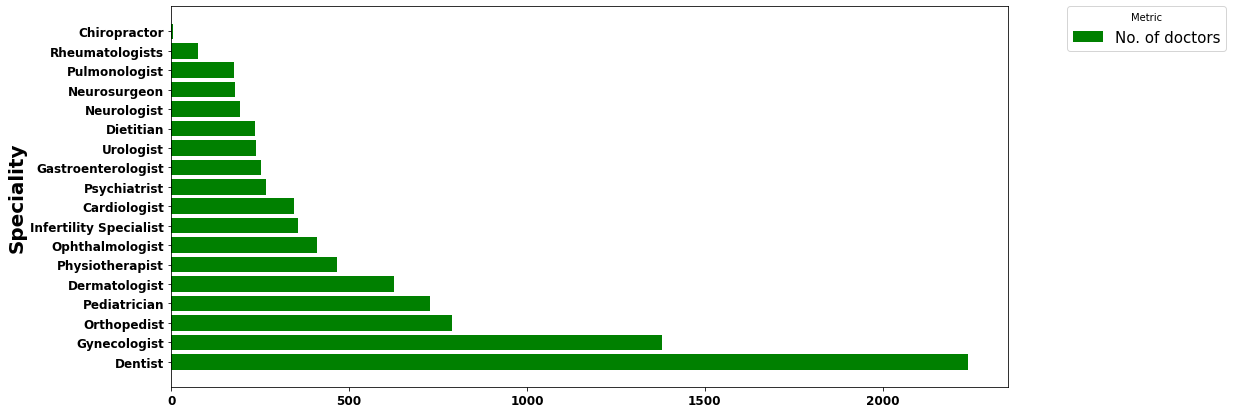

In [33]:
plt.figure(figsize=(15,7))  #graph size

plt.barh(d2['Speciality_of_doctor'],d2['Name'],color='g',label='No. of doctors',linestyle=':',linewidth=2)#assining x-y axis and other aesthetic

plt.ylabel('Speciality',fontsize=20,weight='bold') #y-axis title
plt.xticks(fontsize = 12,weight='bold')
plt.yticks(fontsize = 12,weight='bold')

plt.grid(False) #adding gridlines
plt.legend(loc='upper left', title='Metric',fontsize=15,bbox_to_anchor=(1.07, 1),borderaxespad=0)

plt.show #print graph

Most of the doctors are 'Dentist' and least 'Chiropractor'

#### 3) Number of doctors per speciality in each city

In [34]:
df2.head()

,Name,Degree,Years_Of_Experience,Speciality_of_doctor,Location,City,dp_score,npv,consultation_fee
0,Dr. Ramnaresh Soudri,"MBBS, MD - General Medicine, DM - Cardiology",5,Cardiologist,HSR Layout,Bangalore,96,28,700
1,Dr. Roopa. R,"MBBS, MD - General Medicine, DNB - Cardiology",23,Cardiologist,Banashankari 2nd Stage,Bangalore,95,172,650
2,Dr. Balaraju D,"MD - General Medicine, DNB - Cardiology, MBBS",12,Cardiologist,Jayanagar 9 Block,Bangalore,0,0,750
3,Dr. N Praveen Kumar,"MBBS, MD - General Medicine, Fellowship in Non...",15,Cardiologist,Yelahanka,Bangalore,90,101,500
4,Dr. Srinivas Prasad B V,"MBBS, MD - Medicine, DM - Cardiology",21,Cardiologist,Jayanagar 4 Block,Bangalore,100,19,600


In [35]:
d3 = df2.groupby(by=['City','Speciality_of_doctor'])['Name'].count().reset_index().sort_values(by=['City','Name'],ascending=[True,False])
d3
# this will show number of doctors of each speciality in each city

,City,Speciality_of_doctor,Name
2,Bangalore,Dentist,445
6,Bangalore,Gynecologist,388
12,Bangalore,Pediatrician,236
11,Bangalore,Orthopedist,210
3,Bangalore,Dermatologist,166
...,...,...,...
103,Pune,Urologist,13
101,Pune,Pulmonologist,12
95,Pune,Neurosurgeon,11
94,Pune,Neurologist,10


In [36]:
d3.groupby("City").first() #here 'first' will print first rows of each city group
#shows doctor of which speciality are more in each city

,Speciality_of_doctor,Name
City,,
Bangalore,Dentist,445
Chennai,Dentist,325
Delhi,Dentist,342
Hyderabad,Dentist,294
Mumbai,Dentist,483
Pune,Dentist,351


It is clearly seen that from each city the number of 'dentist' are more as compared to other speciality.

#### 4)Heatmap

<AxesSubplot:>

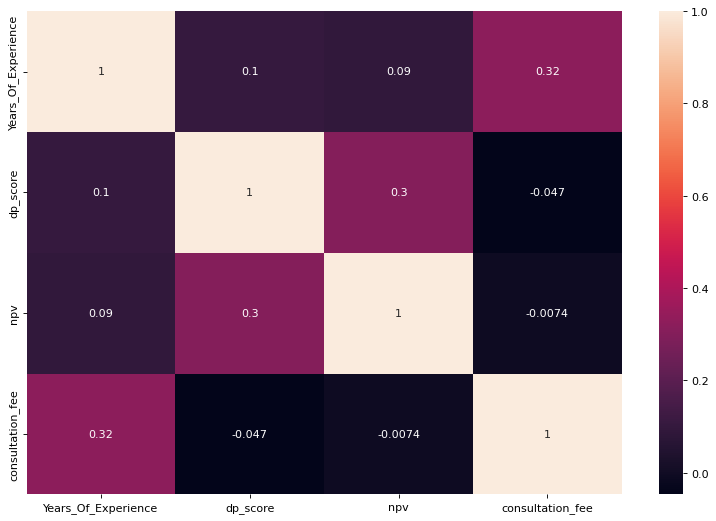

In [37]:
plt.figure(figsize=(12, 8),dpi=80)
sns.heatmap(df2.corr(), annot=True)

#### 5) KDE Plot

<AxesSubplot:xlabel='Years_Of_Experience', ylabel='Density'>

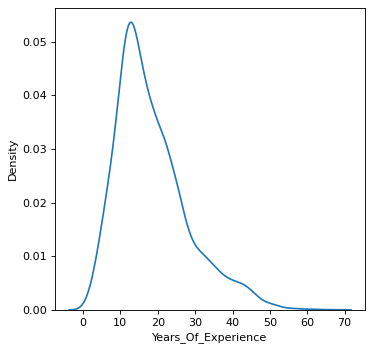

In [38]:
plt.figure(figsize=(5, 5),dpi=80)
sns.kdeplot(df2['Years_Of_Experience'])
#shows distribution according to year of experience

#### 6) Speciality wise Fees Analysis

In [39]:
g = {'consultation_fee':['min','max','median']}

In [40]:
df2.groupby(by=['Speciality_of_doctor']).agg(g).reset_index()

Speciality_of_doctor consultation_fee              
                                        min   max  median
0             Cardiologist              300  3300   900.0
1             Chiropractor              600  3000  2500.0
2                  Dentist                0  2000   350.0
3            Dermatologist                0  3100   700.0
4                Dietitian                0  5000   800.0
5       Gastroenterologist              300  2500   800.0
6             Gynecologist                0  3000   700.0
7   Infertility Specialist                0  3000   700.0
8              Neurologist              400  4100   900.0
9             Neurosurgeon              400  3500   950.0
10         Ophthalmologist                0  5000   630.0
11             Orthopedist              200  4500   700.0
12            Pediatrician                0  3000   750.0
13         Physiotherapist                0  3000   500.0
14            Psychiatrist              400  4000  1200.0
15           Pulmonologist               99  2100   800.0
16         Rheumatologists              300  2500   900.0
17               Urologist                0  3500   800.0

#### 7) Count of doctors (Top5) acoording to location and city

In [41]:
d4=df2.groupby(by=['City','Location'])['Name'].count().reset_index().sort_values(by=['City','Name'],ascending=[True,False])
d4
# shows number of doctors in each city according to to there location in that city

,City,Location,Name
157,Bangalore,Whitefield,132
17,Bangalore,Bannerghatta Road,120
57,Bangalore,Indiranagar,106
121,Bangalore,Old Airport Road,96
45,Bangalore,HSR Layout,92
...,...,...,...
751,Pune,Shastri Nagar,1
753,Pune,Shivane,1
754,Pune,Shukrawar Peth,1
756,Pune,Sopan Baug,1


In [42]:
d5 = d4.nlargest(5, columns=['Name'], keep='all')
d5
#shows top number of doctors city and location wise

,City,Location,Name
157,Bangalore,Whitefield,132
485,Hyderabad,Jubilee Hills,124
17,Bangalore,Bannerghatta Road,120
414,Delhi,Sarita Vihar,110
57,Bangalore,Indiranagar,106


In [43]:
d5['City'].value_counts()
#shows in top 5(number of ductors) how many doctors are there from each city

Bangalore    3
Hyderabad    1
Delhi        1
Name: City, dtype: int64

#### 8) Most common degree

In [44]:
df2['Degree'].value_counts().head(1)

BDS    938
Name: Degree, dtype: int64

#### 9) Doctors having maximum number of specialization

In [45]:
d6 = df2['Name'].value_counts().reset_index()
d6
#shows name of doctors and number of speciality they hold

,index,Name
0,Dr. Vaishali Chaudhary,4
1,Dr. Praveen Kumar,4
2,Dr. Rahul Patil,4
3,Dr. Gaurav Garg,4
4,Dr. Venkatesh,3
...,...,...
8464,Dr. Rucha Kagne,1
8465,Dr. Niketa Sonavane,1
8466,Dr. Sowmya Dogiparthi,1
8467,Dr. G L Sitara,1


In [46]:
d6['Name'].max()
#showing max number of speciality a doctor is holding

4

In [47]:
d6[d6['Name'] == 4]
#shows name of doctor holding maximum number of speciality

,index,Name
0,Dr. Vaishali Chaudhary,4
1,Dr. Praveen Kumar,4
2,Dr. Rahul Patil,4
3,Dr. Gaurav Garg,4


# STEP 5:- Data pre processing

#### 1) Dropping unnecessary columns

In [48]:
df2.head()

,Name,Degree,Years_Of_Experience,Speciality_of_doctor,Location,City,dp_score,npv,consultation_fee
0,Dr. Ramnaresh Soudri,"MBBS, MD - General Medicine, DM - Cardiology",5,Cardiologist,HSR Layout,Bangalore,96,28,700
1,Dr. Roopa. R,"MBBS, MD - General Medicine, DNB - Cardiology",23,Cardiologist,Banashankari 2nd Stage,Bangalore,95,172,650
2,Dr. Balaraju D,"MD - General Medicine, DNB - Cardiology, MBBS",12,Cardiologist,Jayanagar 9 Block,Bangalore,0,0,750
3,Dr. N Praveen Kumar,"MBBS, MD - General Medicine, Fellowship in Non...",15,Cardiologist,Yelahanka,Bangalore,90,101,500
4,Dr. Srinivas Prasad B V,"MBBS, MD - Medicine, DM - Cardiology",21,Cardiologist,Jayanagar 4 Block,Bangalore,100,19,600


In [49]:
df2.drop('Name' , axis=1 , inplace=True)
df2.head()

,Degree,Years_Of_Experience,Speciality_of_doctor,Location,City,dp_score,npv,consultation_fee
0,"MBBS, MD - General Medicine, DM - Cardiology",5,Cardiologist,HSR Layout,Bangalore,96,28,700
1,"MBBS, MD - General Medicine, DNB - Cardiology",23,Cardiologist,Banashankari 2nd Stage,Bangalore,95,172,650
2,"MD - General Medicine, DNB - Cardiology, MBBS",12,Cardiologist,Jayanagar 9 Block,Bangalore,0,0,750
3,"MBBS, MD - General Medicine, Fellowship in Non...",15,Cardiologist,Yelahanka,Bangalore,90,101,500
4,"MBBS, MD - Medicine, DM - Cardiology",21,Cardiologist,Jayanagar 4 Block,Bangalore,100,19,600


#### 2) Encoding

In [50]:
df2.head()

,Degree,Years_Of_Experience,Speciality_of_doctor,Location,City,dp_score,npv,consultation_fee
0,"MBBS, MD - General Medicine, DM - Cardiology",5,Cardiologist,HSR Layout,Bangalore,96,28,700
1,"MBBS, MD - General Medicine, DNB - Cardiology",23,Cardiologist,Banashankari 2nd Stage,Bangalore,95,172,650
2,"MD - General Medicine, DNB - Cardiology, MBBS",12,Cardiologist,Jayanagar 9 Block,Bangalore,0,0,750
3,"MBBS, MD - General Medicine, Fellowship in Non...",15,Cardiologist,Yelahanka,Bangalore,90,101,500
4,"MBBS, MD - Medicine, DM - Cardiology",21,Cardiologist,Jayanagar 4 Block,Bangalore,100,19,600


In [51]:
# 1) Label Encoding

In [52]:
from sklearn.preprocessing import LabelEncoder

In [53]:
le=LabelEncoder()

In [54]:
col=['Degree','Location']
for c in col:
  df2[c]=le.fit_transform(df2[c])

In [55]:
df2.head()

,Degree,Years_Of_Experience,Speciality_of_doctor,Location,City,dp_score,npv,consultation_fee
0,725,5,Cardiologist,217,Bangalore,96,28,700
1,743,23,Cardiologist,55,Bangalore,95,172,650
2,1109,12,Cardiologist,269,Bangalore,0,0,750
3,765,15,Cardiologist,756,Bangalore,90,101,500
4,773,21,Cardiologist,265,Bangalore,100,19,600


In [56]:
# 2) One Hot Encoding

In [57]:
df3 = pd.get_dummies(df2, columns = ['Speciality_of_doctor','City'])

In [58]:
df3.head()

,Degree,Years_Of_Experience,Location,dp_score,npv,consultation_fee,Speciality_of_doctor_Cardiologist,Speciality_of_doctor_Chiropractor,Speciality_of_doctor_Dentist,Speciality_of_doctor_Dermatologist,...,Speciality_of_doctor_Psychiatrist,Speciality_of_doctor_Pulmonologist,Speciality_of_doctor_Rheumatologists,Speciality_of_doctor_Urologist,City_Bangalore,City_Chennai,City_Delhi,City_Hyderabad,City_Mumbai,City_Pune
0,725,5,217,96,28,700,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,743,23,55,95,172,650,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1109,12,269,0,0,750,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,765,15,756,90,101,500,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,773,21,265,100,19,600,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


#### 3) Extract the independent and dependent variables

In [59]:
# Independent Variable
X=df3.drop(['consultation_fee'], axis=1).values

In [60]:
# Dependent Variable
Y=df3['consultation_fee'].values

#### 4) Split the dataset into training and testing

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state=4)

In [63]:
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(6278, 29) (2691, 29) (6278,) (2691,)


#### 5) Use standardization for feature scaling

In [64]:
from sklearn.preprocessing import StandardScaler

In [65]:
sc=StandardScaler()

In [66]:
X_train=sc.fit_transform(X_train)

In [67]:
X_test=sc.transform(X_test)

# STEP 6:- Linear Regression Model

In [68]:
from sklearn.linear_model import LinearRegression

In [69]:
reg=LinearRegression()

In [70]:
reg.fit(X_train, Y_train)

LinearRegression()

In [71]:
reg.intercept_

733.5301031398893

In [72]:
reg.coef_

array([ 1.81557451e+01,  9.76576323e+01,  1.50236796e+01, -9.39819460e+00,
        9.49694422e+00,  8.06234887e+13,  1.17675666e+13,  1.80647549e+14,
        1.07493999e+14,  6.57398560e+13,  7.14624897e+13,  1.51150223e+14,
        7.96656251e+13,  6.11628550e+13,  5.85002142e+13,  8.35717912e+13,
        1.16764575e+14,  1.15575646e+14,  9.41489743e+13,  7.10970517e+13,
        5.61763945e+13,  3.55759625e+13,  6.71240880e+13, -5.07593478e+13,
       -4.10435284e+13, -4.54159375e+13, -4.21678672e+13, -4.42807421e+13,
       -3.84471525e+13])

In [73]:
Y_pred=reg.predict(X_test)

In [74]:
Y_pred

array([ 411.71760314,  523.71760314,  613.93635314, ...,  920.31135314,
       1057.43635314,  879.90510314])

In [75]:
Y_test

array([ 500,  500,  600, ...,  500,  700, 1000], dtype=int64)

#### 2) Evaluating the model using MSE, RMSE and R square

In [76]:
from sklearn import metrics

In [77]:
# Mean Square Error(MSE)
MSE=metrics.mean_squared_error(Y_test, Y_pred)
print('MSE =',MSE)
# Root mean square error(RSME)
RMSE=np.sqrt(MSE)
print('RMSE =',RMSE)
# Coefficient of determination or R-squared
R2=metrics.r2_score(Y_test,Y_pred)
print('R-squared =',R2)

MSE = 93471.5860470164
RMSE = 305.73123171670966
R-squared = 0.5001493769240553


# STEP 7:- PCA(Principal Component Analysis)

In [78]:
df3.head()

,Degree,Years_Of_Experience,Location,dp_score,npv,consultation_fee,Speciality_of_doctor_Cardiologist,Speciality_of_doctor_Chiropractor,Speciality_of_doctor_Dentist,Speciality_of_doctor_Dermatologist,...,Speciality_of_doctor_Psychiatrist,Speciality_of_doctor_Pulmonologist,Speciality_of_doctor_Rheumatologists,Speciality_of_doctor_Urologist,City_Bangalore,City_Chennai,City_Delhi,City_Hyderabad,City_Mumbai,City_Pune
0,725,5,217,96,28,700,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,743,23,55,95,172,650,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1109,12,269,0,0,750,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,765,15,756,90,101,500,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,773,21,265,100,19,600,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


#### 1) Creating new dataframe containing only continous columns (because PCA deals with continous columns)

In [79]:
new_df = df3[['Years_Of_Experience','dp_score','npv']]
new_df

,Years_Of_Experience,dp_score,npv
0,5,96,28
1,23,95,172
2,12,0,0
3,15,90,101
4,21,100,19
...,...,...,...
8970,12,0,0
8971,4,0,0
8972,25,0,0
8973,11,0,0


#### 2) Standardization of new dataframe (new_df)

In [80]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [81]:
X_transformed=sc.fit_transform(new_df)
X_transformed

array([[-1.39012526,  0.77886743, -0.30120902],
       [ 0.4720105 ,  0.7572519 ,  0.12140243],
       [-0.66596135, -1.29622292, -0.38338347],
       ...,
       [ 0.67891448, -1.29622292, -0.38338347],
       [-0.76941334, -1.29622292, -0.38338347],
       [-0.76941334, -1.29622292, -0.38338347]])

#### 3) PCA

In [82]:
from sklearn.decomposition import PCA

In [83]:
# 1) selecting the number of components
pca=PCA(n_components=2)

In [84]:
# 2) find the principal component and then recast the data(X_transformed) into principal component
principal_components=pca.fit_transform(X_transformed) 
principal_components

array([[-0.18114253,  1.38726385],
       [ 0.75219029, -0.23394305],
       [-1.35151676,  0.21850081],
       ...,
       [-0.86717035, -1.03504374],
       [-1.38877418,  0.31492731],
       [-1.38877418,  0.31492731]])

In [85]:
# 3) showing how much information contained by each component
pca.explained_variance_ratio_ 

array([0.45189713, 0.31580812])

In [86]:
np.sum(pca.explained_variance_ratio_)

0.7677052504890804

In [87]:
# 4) creating datadrame of principal_components
pca_df=pd.DataFrame(data=principal_components,columns=['PC1','PC2']).reset_index()
pca_df

,index,PC1,PC2
0,0,-0.181143,1.387264
1,1,0.752190,-0.233943
2,2,-1.351517,0.218501
3,3,0.245797,0.454103
4,4,0.455048,-0.143414
...,...,...,...
8964,8964,-1.351517,0.218501
8965,8965,-1.649576,0.989913
8966,8966,-0.867170,-1.035044
8967,8967,-1.388774,0.314927


In [88]:
# 5) From original dataframe(df3) creating a dataframe such that it does not contain columns of datafrme(new_df)
sub_df = df3.drop(columns = ['Years_Of_Experience','dp_score','npv'],axis=1).reset_index()
sub_df

,index,Degree,Location,consultation_fee,Speciality_of_doctor_Cardiologist,Speciality_of_doctor_Chiropractor,Speciality_of_doctor_Dentist,Speciality_of_doctor_Dermatologist,Speciality_of_doctor_Dietitian,Speciality_of_doctor_Gastroenterologist,...,Speciality_of_doctor_Psychiatrist,Speciality_of_doctor_Pulmonologist,Speciality_of_doctor_Rheumatologists,Speciality_of_doctor_Urologist,City_Bangalore,City_Chennai,City_Delhi,City_Hyderabad,City_Mumbai,City_Pune
0,0,725,217,700,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,1,743,55,650,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,2,1109,269,750,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,3,765,756,500,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,4,773,265,600,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8964,8970,955,336,500,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
8965,8971,955,413,600,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
8966,8972,555,361,680,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
8967,8973,955,234,700,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0


In [89]:
# 6) concat 'pca_df' and 'sub_df'
final_df = pd.concat([pca_df,sub_df],axis=1)
final_df

,index,PC1,PC2,index,Degree,Location,consultation_fee,Speciality_of_doctor_Cardiologist,Speciality_of_doctor_Chiropractor,Speciality_of_doctor_Dentist,...,Speciality_of_doctor_Psychiatrist,Speciality_of_doctor_Pulmonologist,Speciality_of_doctor_Rheumatologists,Speciality_of_doctor_Urologist,City_Bangalore,City_Chennai,City_Delhi,City_Hyderabad,City_Mumbai,City_Pune
0,0,-0.181143,1.387264,0,725,217,700,1,0,0,...,0,0,0,0,1,0,0,0,0,0
1,1,0.752190,-0.233943,1,743,55,650,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,2,-1.351517,0.218501,2,1109,269,750,1,0,0,...,0,0,0,0,1,0,0,0,0,0
3,3,0.245797,0.454103,3,765,756,500,1,0,0,...,0,0,0,0,1,0,0,0,0,0
4,4,0.455048,-0.143414,4,773,265,600,1,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8964,8964,-1.351517,0.218501,8970,955,336,500,0,0,0,...,0,0,0,1,0,0,0,1,0,0
8965,8965,-1.649576,0.989913,8971,955,413,600,0,0,0,...,0,0,0,1,0,0,0,1,0,0
8966,8966,-0.867170,-1.035044,8972,555,361,680,0,0,0,...,0,0,0,1,0,0,0,1,0,0
8967,8967,-1.388774,0.314927,8973,955,234,700,0,0,0,...,0,0,0,1,0,0,0,1,0,0


In [90]:
# 7) Droping Unnecessary columns
final_df.drop('index' , axis=1 , inplace=True)
final_df.head()

,PC1,PC2,Degree,Location,consultation_fee,Speciality_of_doctor_Cardiologist,Speciality_of_doctor_Chiropractor,Speciality_of_doctor_Dentist,Speciality_of_doctor_Dermatologist,Speciality_of_doctor_Dietitian,...,Speciality_of_doctor_Psychiatrist,Speciality_of_doctor_Pulmonologist,Speciality_of_doctor_Rheumatologists,Speciality_of_doctor_Urologist,City_Bangalore,City_Chennai,City_Delhi,City_Hyderabad,City_Mumbai,City_Pune
0,-0.181143,1.387264,725,217,700,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0.752190,-0.233943,743,55,650,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,-1.351517,0.218501,1109,269,750,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0.245797,0.454103,765,756,500,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0.455048,-0.143414,773,265,600,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


#### 4) Linear Regression Model

In [91]:
# 1) Extract the independent(X) and dependent(Y) variables
X=final_df.drop(['consultation_fee'], axis=1).values
Y=final_df['consultation_fee'].values

In [92]:
# 2) Split the dataset into training and testing
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state=4)

In [93]:
# 3)
reg.fit(X_train, Y_train)

LinearRegression()

In [94]:
reg.intercept_

881.1758157882746

In [95]:
reg.coef_

array([ 3.49210762e+01, -8.95760086e+01,  4.47104118e-02,  6.68846899e-02,
        3.70239976e+01,  1.35374404e+03, -4.86533165e+02, -1.29298245e+02,
        7.44314427e+01, -9.66432737e+00, -1.95211135e+02, -2.17017153e+02,
        7.87363512e+01,  8.43179630e+01, -3.10251476e+02, -1.27979571e+02,
       -1.74115502e+02, -2.93954243e+02,  3.58179870e+02, -1.40234374e+01,
        1.09241745e+01, -3.93095815e+01, -8.88323010e+01, -1.21071440e+02,
        1.86029759e+02, -1.59263244e+02,  3.16841006e+02, -1.33703780e+02])

In [96]:
Y_pred=reg.predict(X_test)
Y_pred

array([ 400.33200058,  513.71410897,  617.32669286, ...,  935.73232725,
       1068.85167425,  883.23900315])

In [97]:
Y_test

array([ 500,  500,  600, ...,  500,  700, 1000], dtype=int64)

In [98]:
# 4) Evaluating the model

In [99]:
# Mean Square Error(MSE)
MSE=metrics.mean_squared_error(Y_test, Y_pred)
print('MSE =',MSE)
# Root mean square error(RSME)
RMSE=np.sqrt(MSE)
print('RMSE =',RMSE)
# Coefficient of determination or R-squared
R2=metrics.r2_score(Y_test,Y_pred)
print('R-squared =',R2)

MSE = 93876.21934263923
RMSE = 306.39226384267477
R-squared = 0.4979855513863929
